In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd
import patrick_stylez as ps

# %matplotlib notebook

Using TensorFlow backend.


In [2]:

    

left_edge  = [0, 0]
right_edge = [40500.0, -71.5]
a = ((right_edge[1])-(left_edge[1])) / ((right_edge[0])-(left_edge[0]))
b = (right_edge[1]) - a * (right_edge[0])
fiducial_r = 23

x_positions_all = {}
y_positions_all = {}
z_positions_all = {}
r_positions_fiducial_all = {}
r_positions_all = {}
drift_time_all = {}

# def CutCondition(integral, width, i):
#     if integral[i] > 100 and integral[i] < 4000 and width[i] > 30 and width[i] < 50:
#         return(True)
#     else:
#         return(False)
run_list = ['00158', '00178']
#-----------kr-------cs----------#
for run in run_list:
    
    def CutCondition(waveform, integral,width,i):  
        
        if run == '00158':
            
            FirstPeak_area = sum(waveform[:15])
            SecondPeak_area = sum(waveform[15:])    
            if  FirstPeak_area > 100 and FirstPeak_area < 600 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
                return(True)
            else:
                return(False)
        if run == '00178':
            
            if integral[i] > 100 and integral[i] < 4000 and width[i] > 30 and width[i] < 50:
                return(True)
            else:
                return(False)


# def CutCondition(integral, width, i):
#     if integral[i] > 100 and integral[i] < 4000 and width[i] > 30 and width[i] < 50:
#         return(True)
#     else:
#         return(False)
    
    def PrintWaveform(waveform,i):

        fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,sharex=False, figsize=(30, 5))
        ax1.plot(waveform[i])
        ax2.plot(waveform[i+1])
        ax3.plot(waveform[i+2])
        ax4.plot(waveform[i+3])
        ax5.plot(waveform[i+4])
        ax6.plot(waveform[i+5])
        ax7.plot(waveform[i+6])
        plt.show()


    def drifttime_to_z(t):
        return a * t + b

    def S2_found(integral, width):
        #maximum_S2 = max(waveform)
        if integral > 500 and width >200 and width < 2000:
            return True
        else:
            return False

    
    def Process(waveform, i): 
        SelectionCutFlag = CutCondition(waveform[i], integral, width, i)
    #     SelectionCutFlag = CutCondition(integral, width, i)
        if SelectionCutFlag == True:

            ###################### put something here to find the S1 without ss cut###########

            j = 1
            counter_timestamp = timestamp[i+j]
            threshold_timestamp = timestamp[i] + 45000
            while threshold_timestamp >= counter_timestamp and  S2_found(integral = integral[i+j], width = width[i+j]) == False:  
                j += 1
                counter_timestamp = timestamp[i+j]
            else:
                if S2_found(integral = integral[i+j], width = width[i+j]):  
                    k=1 
                    s2_counter_timestamp = timestamp[i+j+k]
                    while threshold_timestamp >= s2_counter_timestamp and S2_found(integral = integral[i+j+k], width = width[i+j+k]) == False:
                        k += 1
                        s2_counter_timestamp = timestamp[i+j+k]
                    else:
                        if threshold_timestamp <= s2_counter_timestamp:
                            if area_per_channel[i+j][1] > 0 and area_per_channel[i+j][2] > 0 \
                                and area_per_channel[i+j][3] > 0 and area_per_channel[i+j][4] > 0 \
                                and area_per_channel[i+j][5] > 0 and area_per_channel[i+j][6] > 0 \
                                and area_per_channel[i+j][7] > 0 \
                                :
                        ######## find your S1 and S2 here if u want to exclude double scatters
                                    r_position = np.sqrt(x_position[i+j]**2 + y_position[i+j]**2)
                                    z_position = drifttime_to_z(timestamp[i+j] - timestamp[i])
                                    time       = timestamp[i+j] - timestamp[i]
                                    drift_time.append(time)
                                    r.append(r_position)
                            
                                    if r_position <= fiducial_r and z_position >= -75:
                                
                                        r_fiducial.append(r_position)
                                        x.append(x_position[i+j])
                                        y.append(y_position[i+j])
                                        z.append(z_position)





                    return
                else:
                    return



# def Process(waveform, i):

#     CutFlag = CutCondition(waveform[i])
#     if CutFlag == True:
        
#         found = False
#         k = 1
        
#         time_limit = 65000 # 65000 for E_D = 50 V/cm
        
#         #while(found == False and k <= 9):
#         while(found == False and timestamp[i+k] < timestamp[i]+time_limit):
            
#             #if integral[i+k] > 300 and width[i+k] >200 and width[i+k] < 2000 and timestamp[i+k] < timestamp[i]+time_limit:
#             #if integral[i+k] > 300 and width[i+k] >200 and width[i+k] < 2000: 
#             if integral[i+k] > 500 and width[i+k] >200 and width[i+k] < 2000:

                
#                 drift_time.append(timestamp[i+k] - timestamp[i])

                
#                 found = True
                
#             else:
#                 k = k+1
    


    ctx = straxbra.XebraContext()
    peaks_data = ctx.get_array(run, 'peaks')
    position_data = ctx.get_array(run, 'peak_positions')

    waveform = peaks_data['data']
    integral = peaks_data['area']
    width = peaks_data['width'][:,5]
    timestamp = peaks_data['time']
    x_position = position_data['x']
    y_position = position_data['y']
    area_per_channel = peaks_data['area_per_channel']

    drift_time = []  
    z = []
    r = []
    r_fiducial = []
    x = []
    y = []
    
    x_positions_all.update({run:x})
    y_positions_all.update({run:y})
    z_positions_all.update({run:z})
    r_positions_fiducial_all.update({run:r_fiducial})
    r_positions_all.update({run:r})
    drift_time_all.update({run:drift_time})

    num = len(waveform)
    print_counter = 0.0
    for i in range(0,num):    
        Process(waveform,i)
        if i/num >= print_counter:
            print(round(print_counter,2), end = ' ')
            print_counter += 0.1
    print(1.0, '        Run ',run, 'done!')


0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00158 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00178 done!


# Convert drift time into z coordinate

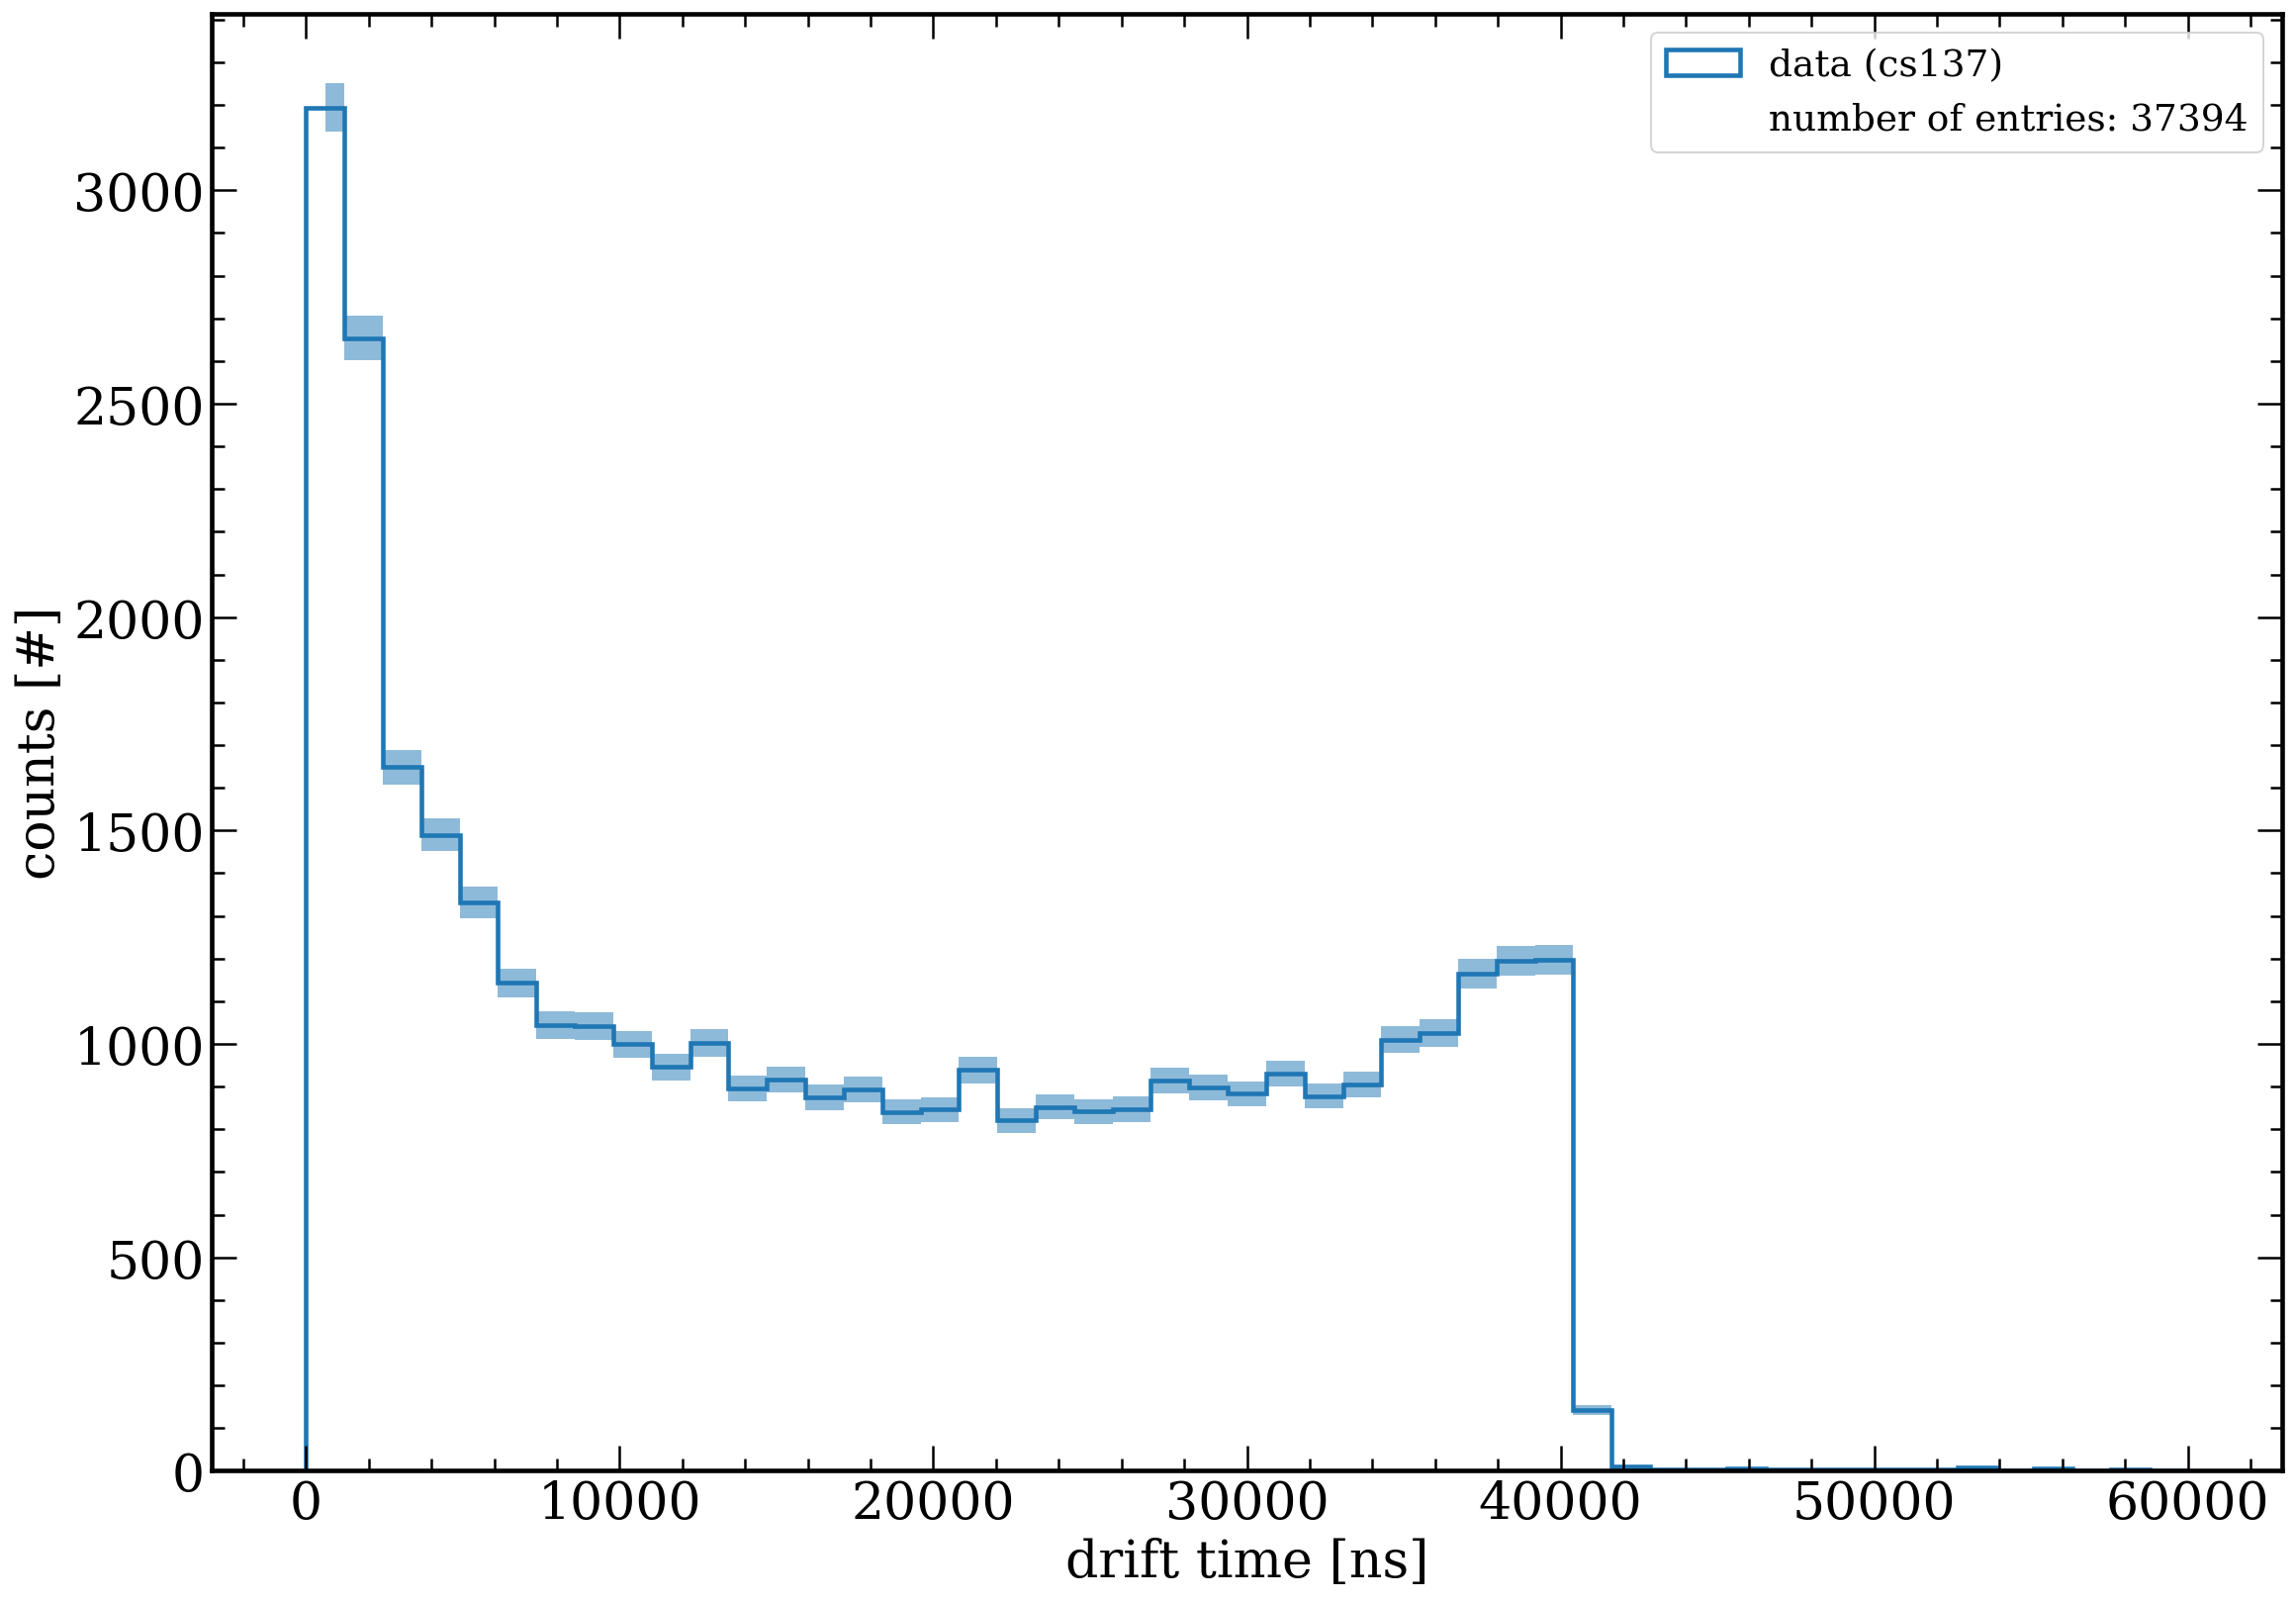

In [3]:

fig, axes = ps.styles()


time_limit = 60000 

bins_x = np.linspace(0,time_limit,50)
bins_x_center = (bins_x[1:] + bins_x[:-1])/2
bin_fullwidths = (bins_x[1:] - bins_x[:-1])

counts,_, patches = plt.hist(drift_time_all['00178'], bins=bins_x, density = False, 
                            histtype='step', linewidth = 2.2, color = 'C0',
                            label = 'data (cs137)')


plt.fill_between(bins_x_center, counts - np.sqrt(counts), counts + np.sqrt(counts), 
                 facecolor='C0', alpha=0.5, step = 'mid')


axes.plot([], [], ' ', label="number of entries: "+str(len(drift_time_all['00178'])))
axes.set_xlabel('drift time [ns]')
axes.set_ylabel('counts [#]')

handles,labels = axes.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]


axes.legend(handles,labels, loc = 1,prop={'size': 18})
plt.ylim(bottom = 0)
plt.show()


In [4]:
# print('[drift time in ns, corresponding z position in mm]')
# left_edge  = [0, 2.5]
# right_edge = [40500.0, -71.5]
# a = ((right_edge[1])-(left_edge[1])) / ((right_edge[0])-(left_edge[0]))
# b = (right_edge[1]) - a * (right_edge[0])
# def drifttime_to_z(t):
#     return a * t + b

In [5]:
# drift_time = np.array(drift_time)
# z = drifttime_to_z(drift_time)
# z_list = list(z)
#print(z_list)


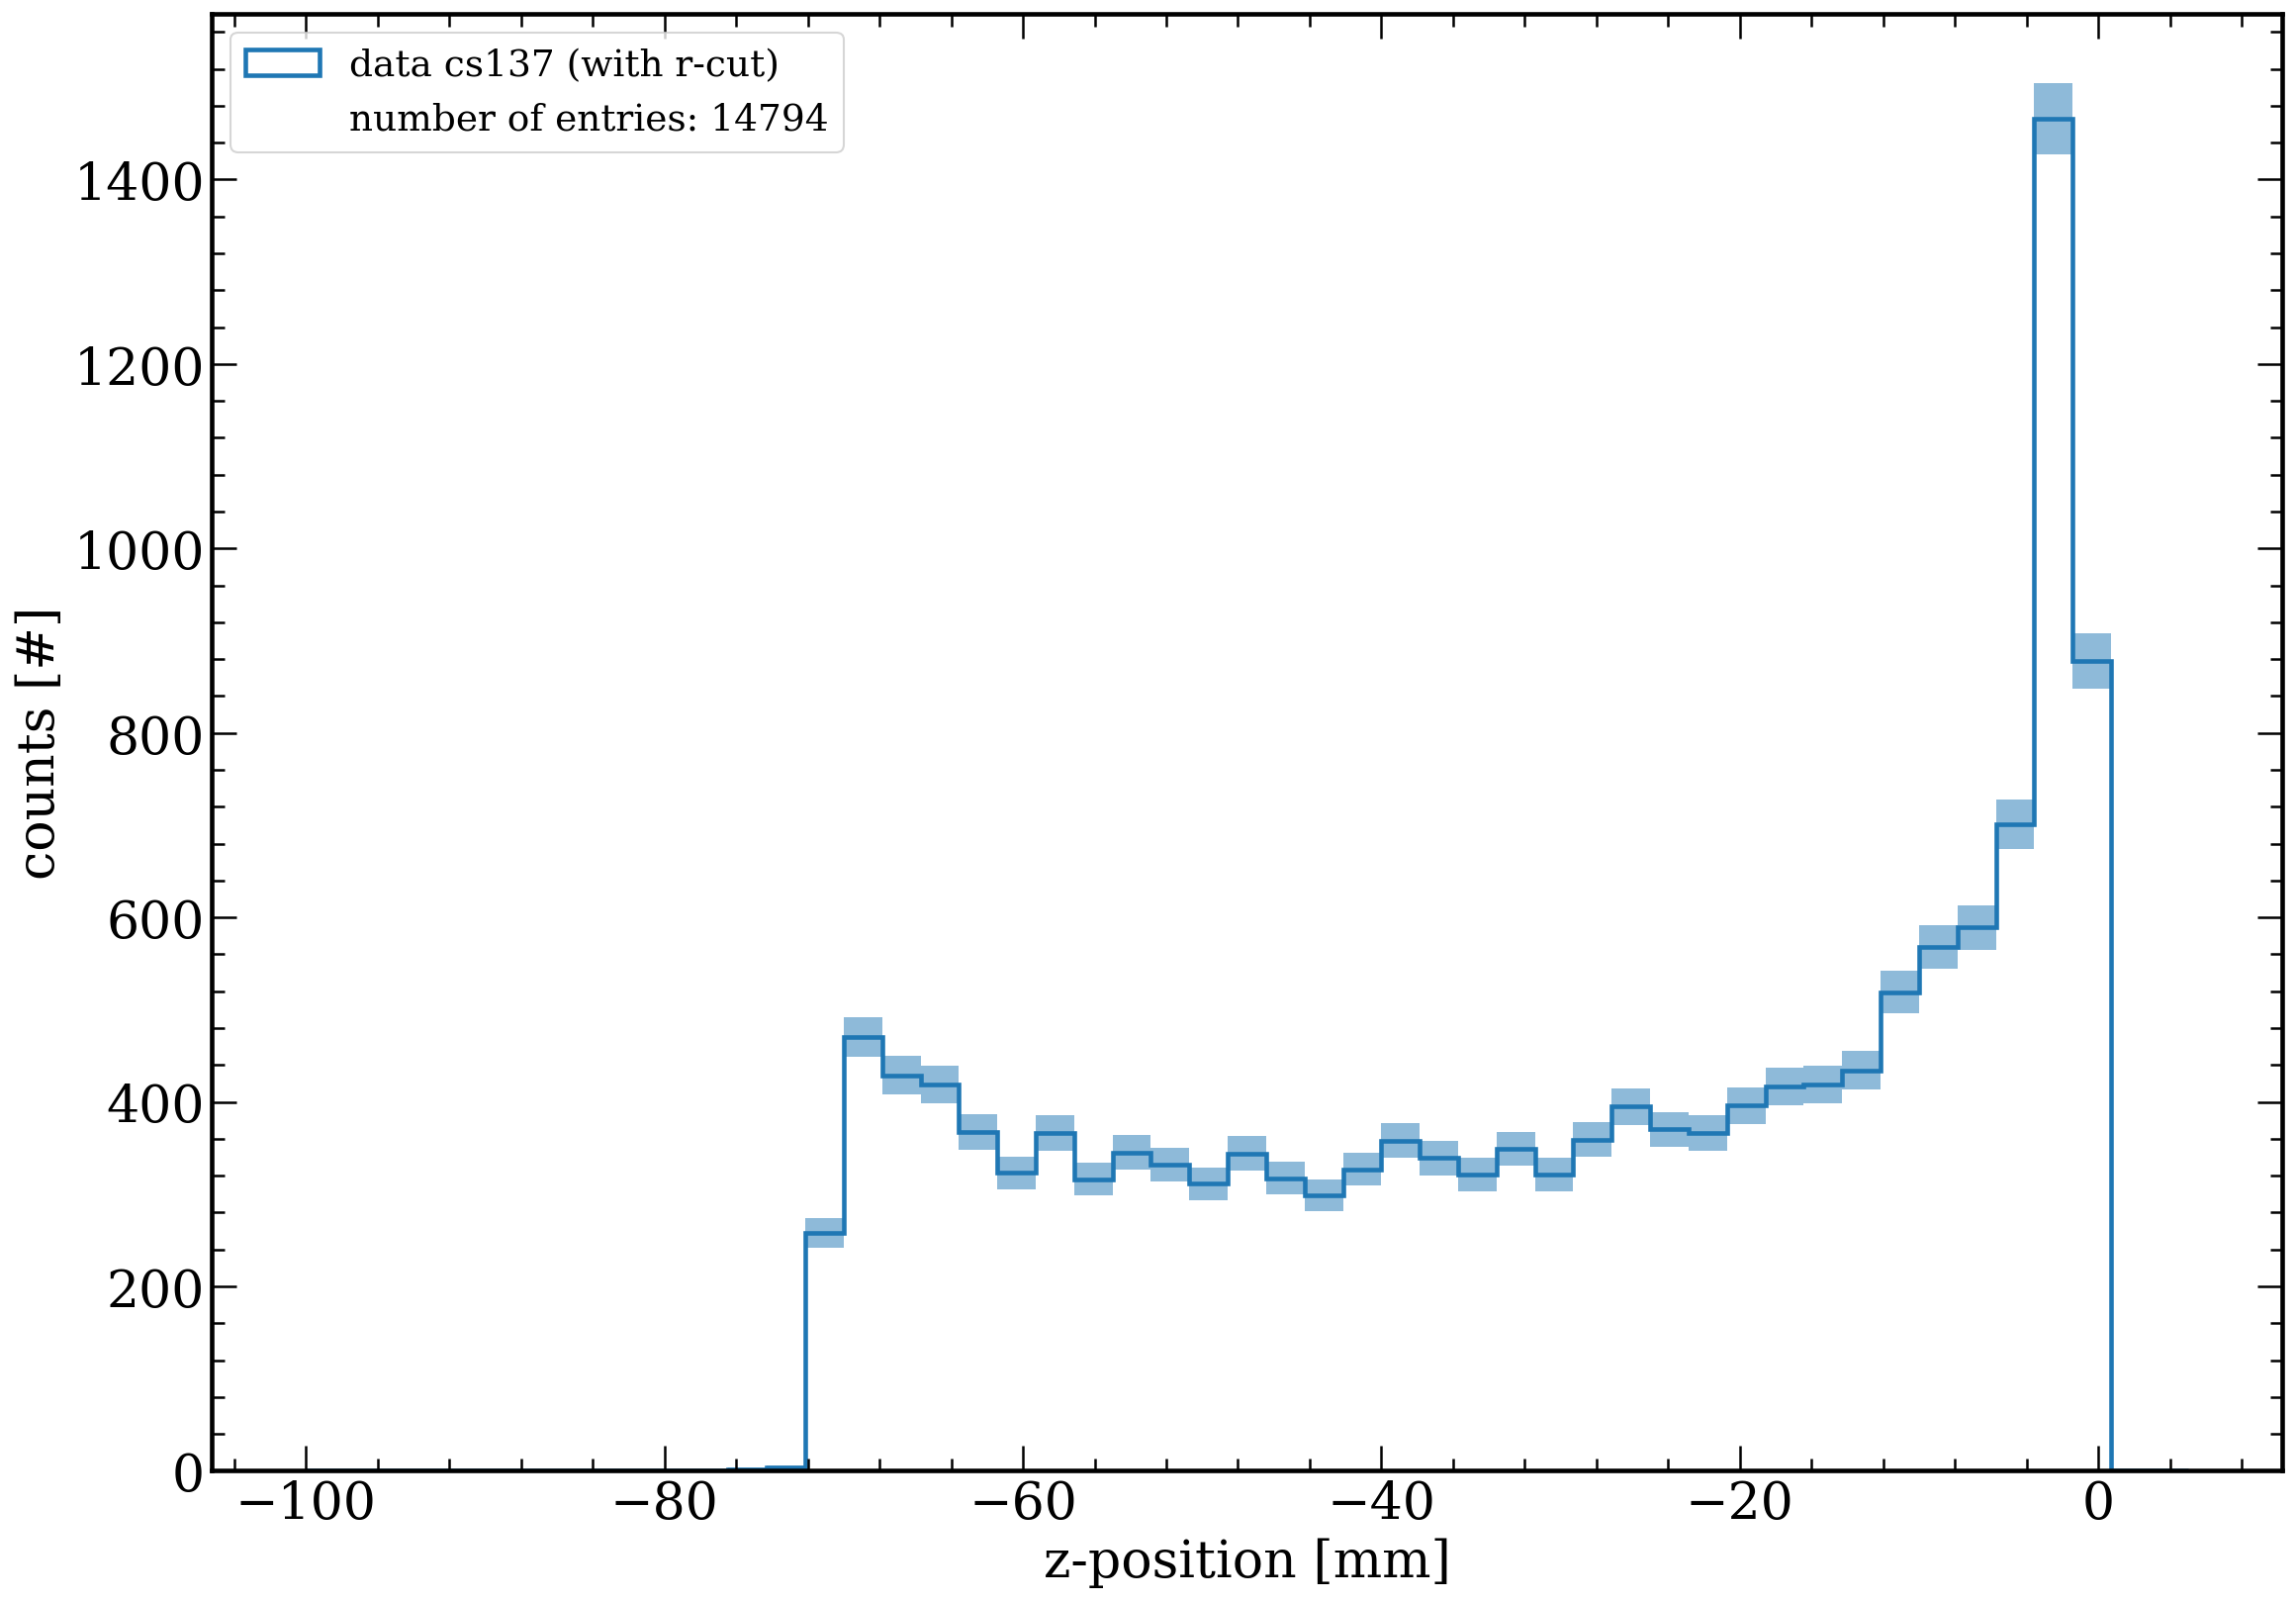

In [6]:
fig, axes = ps.styles()


bins_x = np.linspace(-100,5,50)
bins_x_center = (bins_x[1:] + bins_x[:-1])/2
bin_fullwidths = (bins_x[1:] - bins_x[:-1])

counts,_, patches = plt.hist(z_positions_all['00178'], bins=bins_x, density = False, 
                            histtype='step', linewidth = 2.2, color = 'C0',
                            label = 'data cs137 (with r-cut)')


plt.fill_between(bins_x_center, counts - np.sqrt(counts), counts + np.sqrt(counts), 
                 facecolor='C0', alpha=0.5, step = 'mid')

axes.plot([], [], ' ', label="number of entries: "+str(len(z_positions_all['00178'])))
axes.set_xlabel('z-position [mm]')
axes.set_ylabel('counts [#]')

handles,labels = axes.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]


axes.legend(handles,labels, loc = 2,prop={'size': 18})

plt.ylim(bottom = 0)
plt.show()


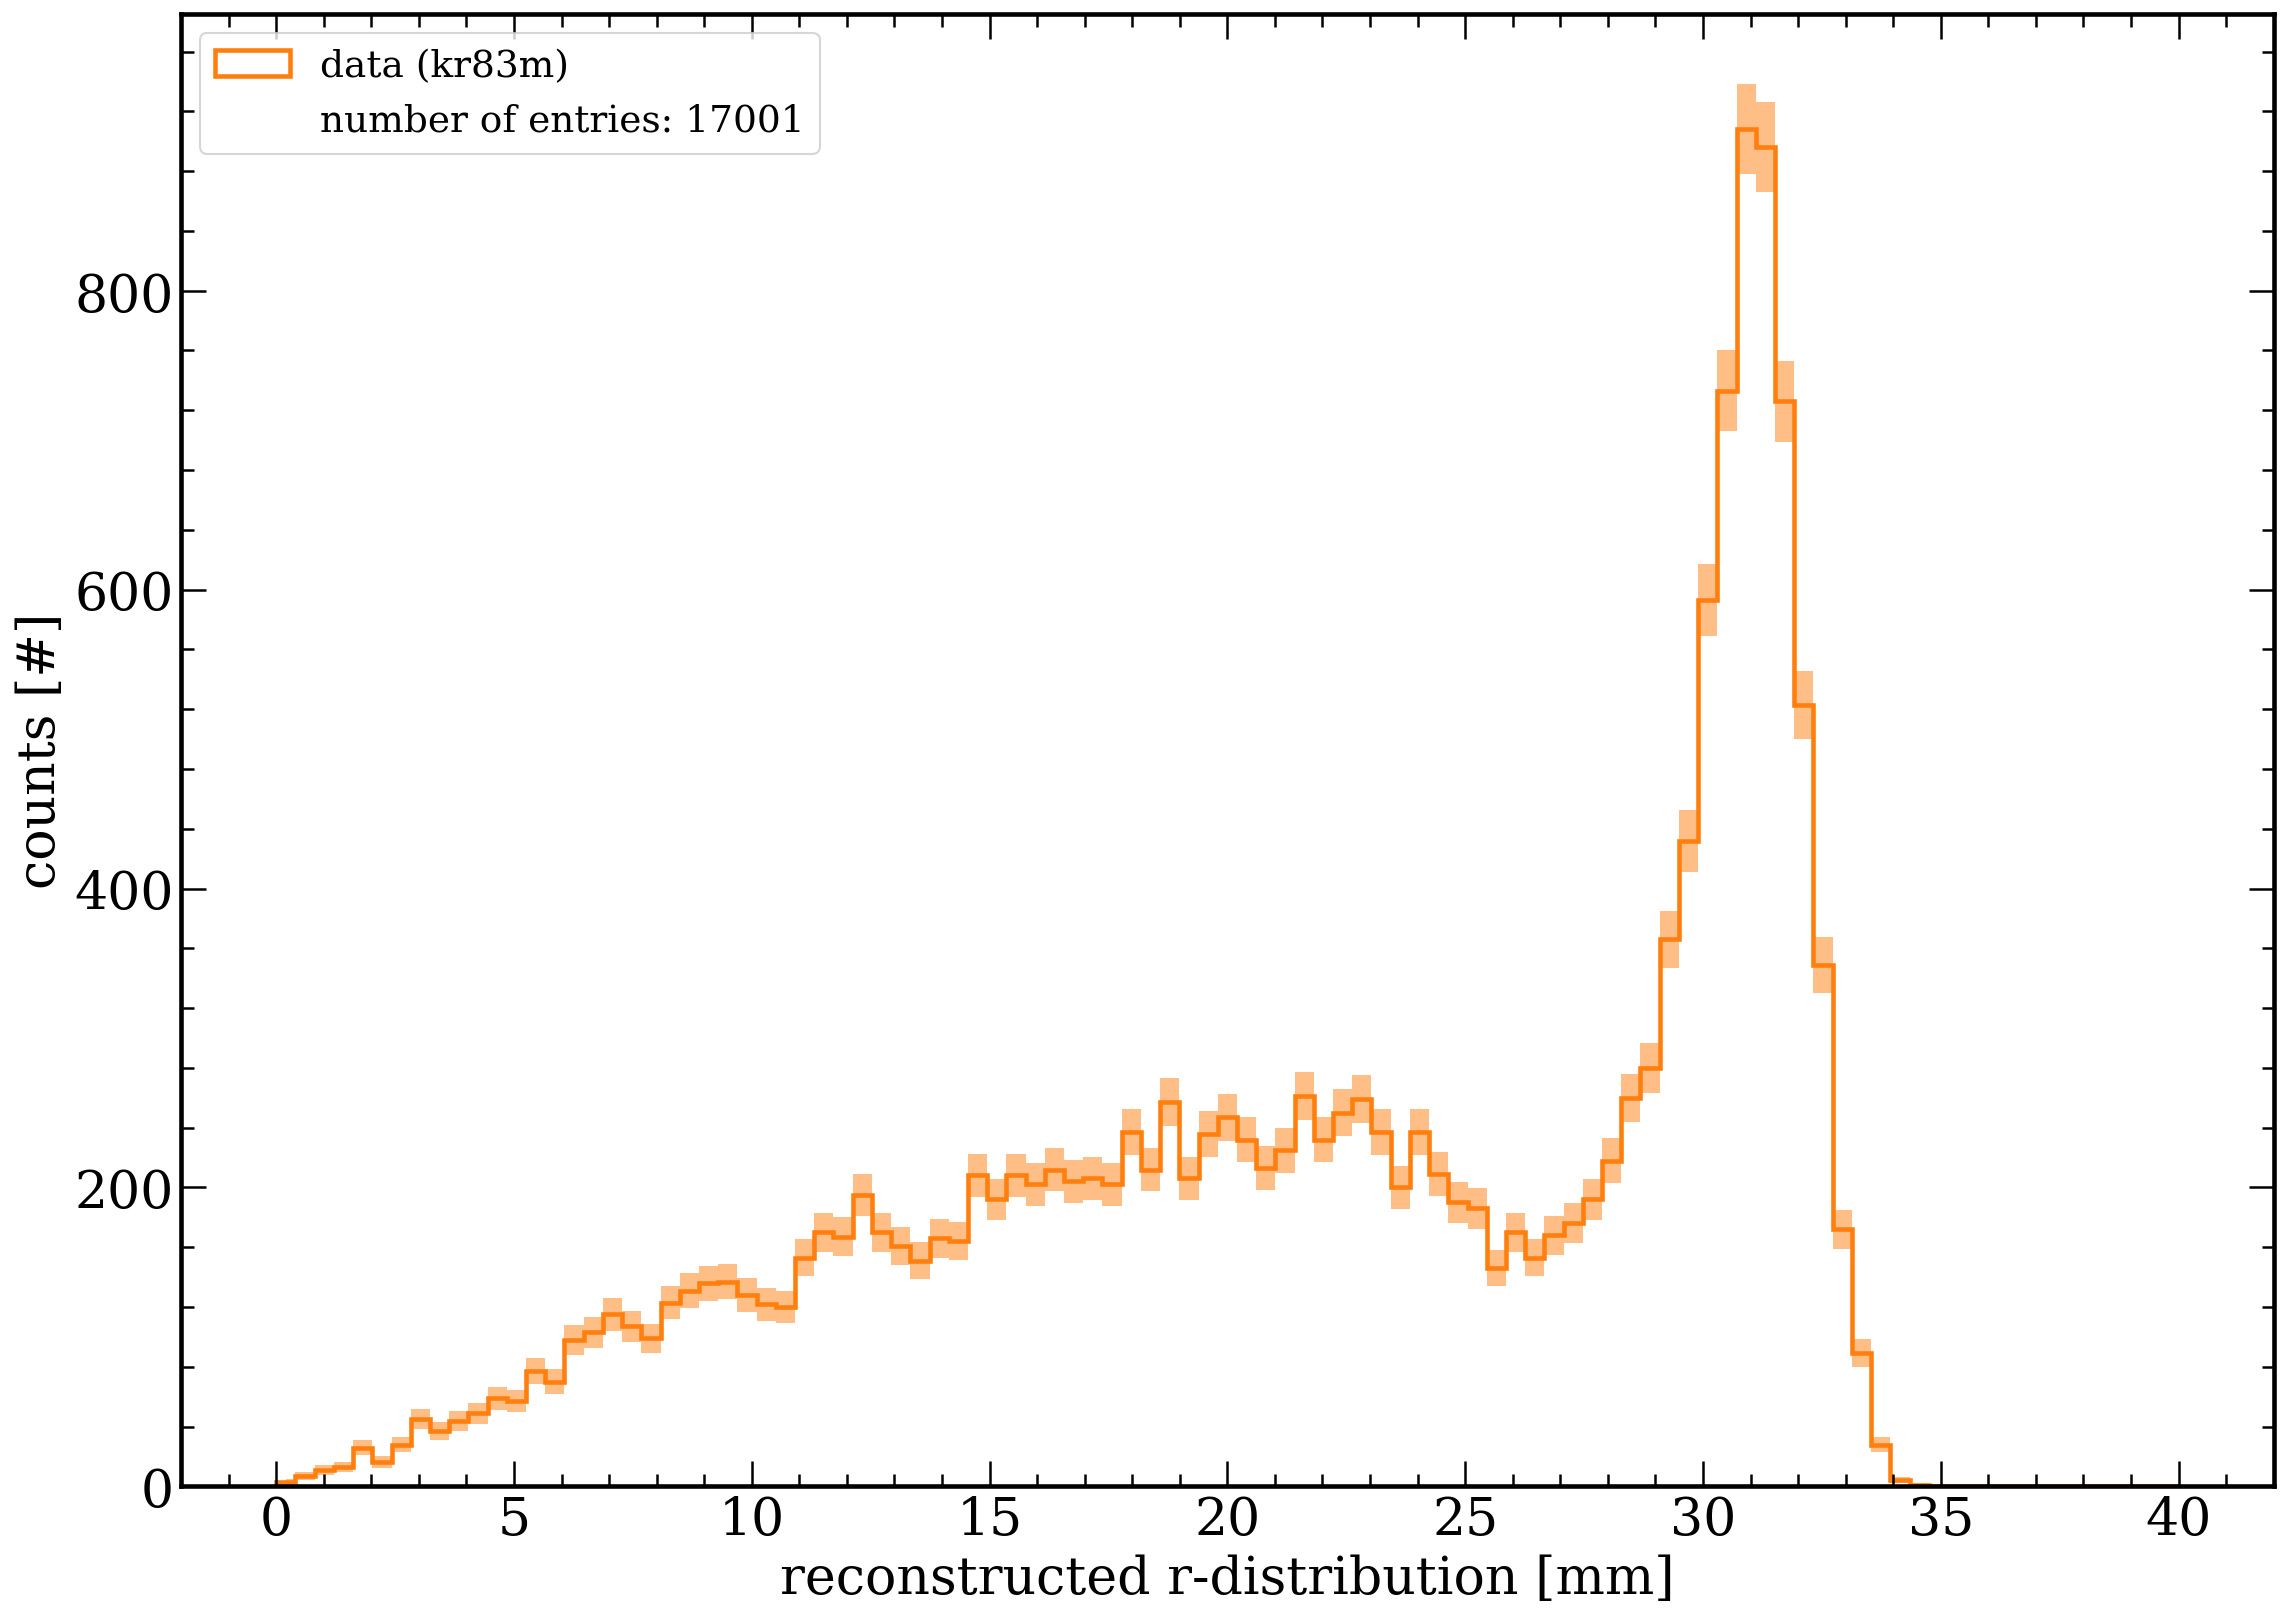

In [7]:
fig, axes = ps.styles()


bins_x = np.linspace(0,40,100)
bns = 70
bins_x_center = (bins_x[1:] + bins_x[:-1])/2
bin_fullwidths = (bins_x[1:] - bins_x[:-1])

counts,_, patches = plt.hist(r_positions_all['00158'], bins=bins_x, density = False, 
                            histtype='step', linewidth = 2.2, color = 'C1',
                            label = 'data (kr83m)')


plt.fill_between(bins_x_center, counts - np.sqrt(counts), counts + np.sqrt(counts), 
                 facecolor='C1', alpha=0.5, step = 'mid')


axes.plot([], [], ' ', label="number of entries: "+str(len(r_positions_all['00158'])))
axes.set_xlabel('reconstructed r-distribution [mm]')
axes.set_ylabel('counts [#]')

handles,labels = axes.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]


axes.legend(handles,labels, loc = 2,prop={'size': 18})

plt.ylim(bottom = 0)
plt.show()


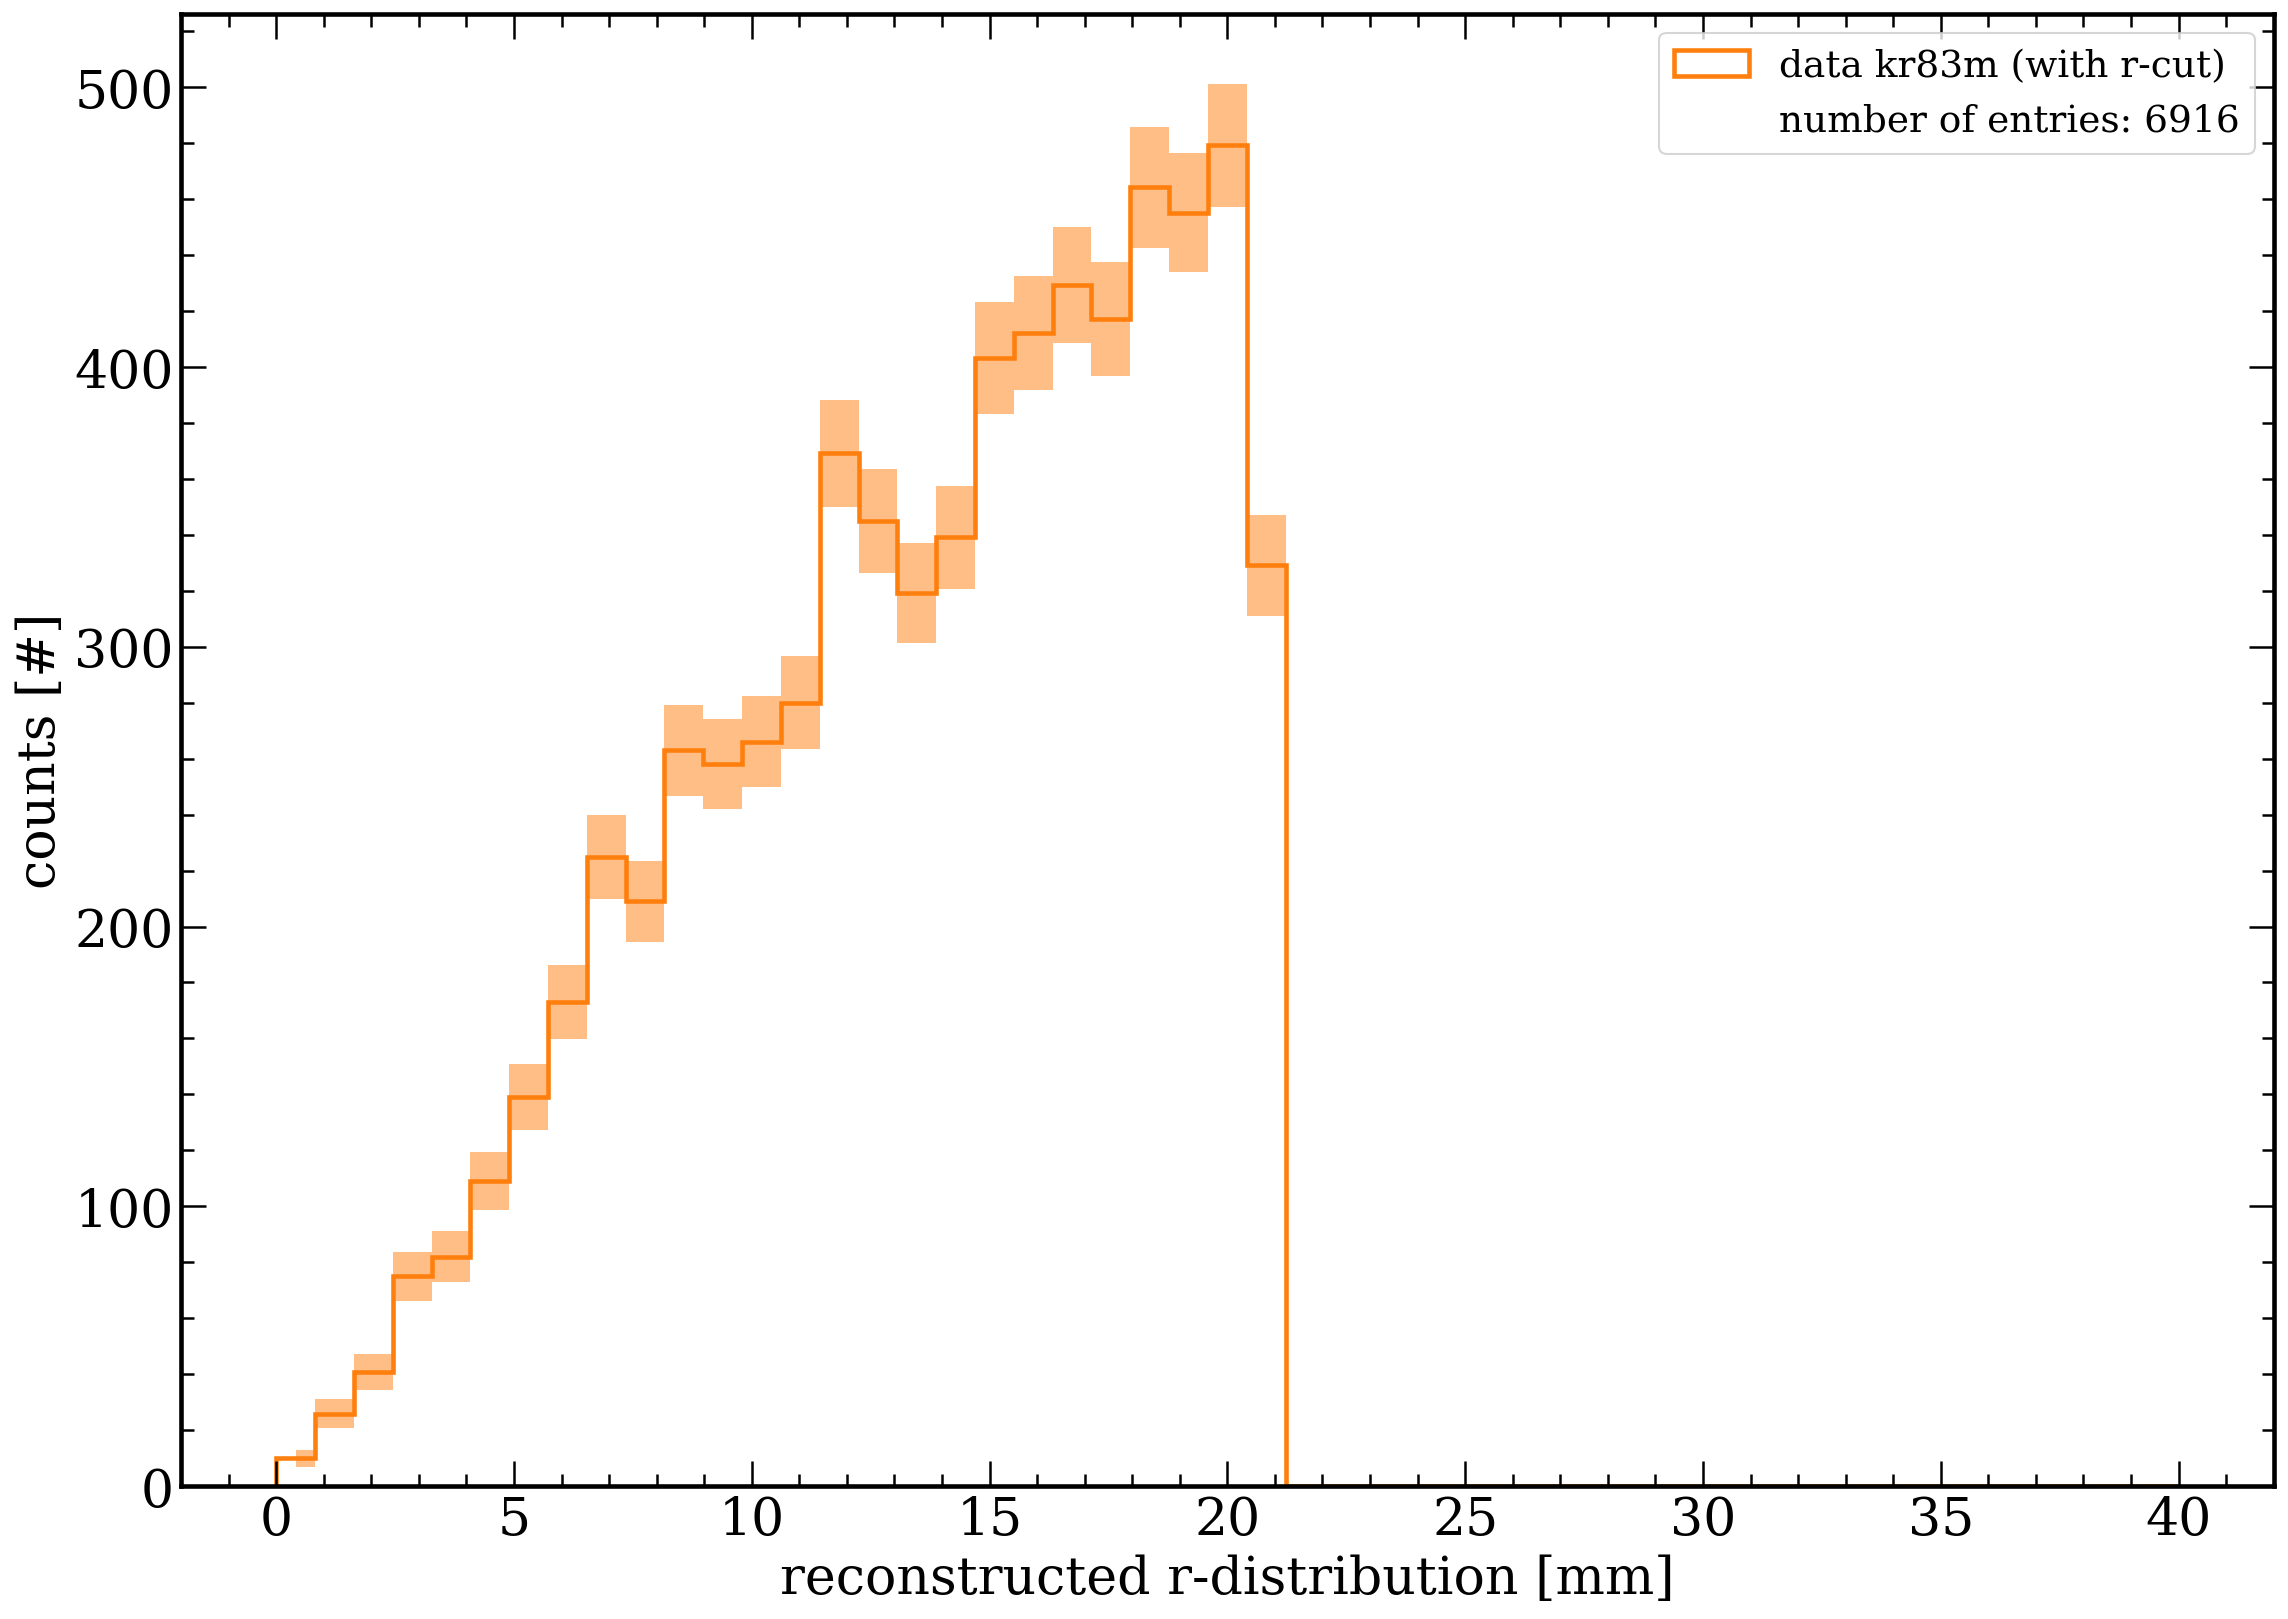

In [8]:
fig, axes = ps.styles()

bins_x = np.linspace(0,40,50)
bins_x_center = (bins_x[1:] + bins_x[:-1])/2
bin_fullwidths = (bins_x[1:] - bins_x[:-1])

counts,_, patches = plt.hist(r_positions_fiducial_all['00158'], bins=bins_x, density = False, 
                            histtype='step', linewidth = 2.2, color = 'C1',
                            label = 'data kr83m (with r-cut)')


plt.fill_between(bins_x_center, counts - np.sqrt(counts), counts + np.sqrt(counts), 
                 facecolor='C1', alpha=0.5, step = 'mid')


axes.plot([], [], ' ', label="number of entries: "+str(len(r_positions_fiducial_all['00158'])))
axes.set_xlabel('reconstructed r-distribution [mm]')
axes.set_ylabel('counts [#]')

handles,labels = axes.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]


axes.legend(handles,labels, loc = 1,prop={'size': 18})

plt.ylim(bottom = 0)
plt.show()


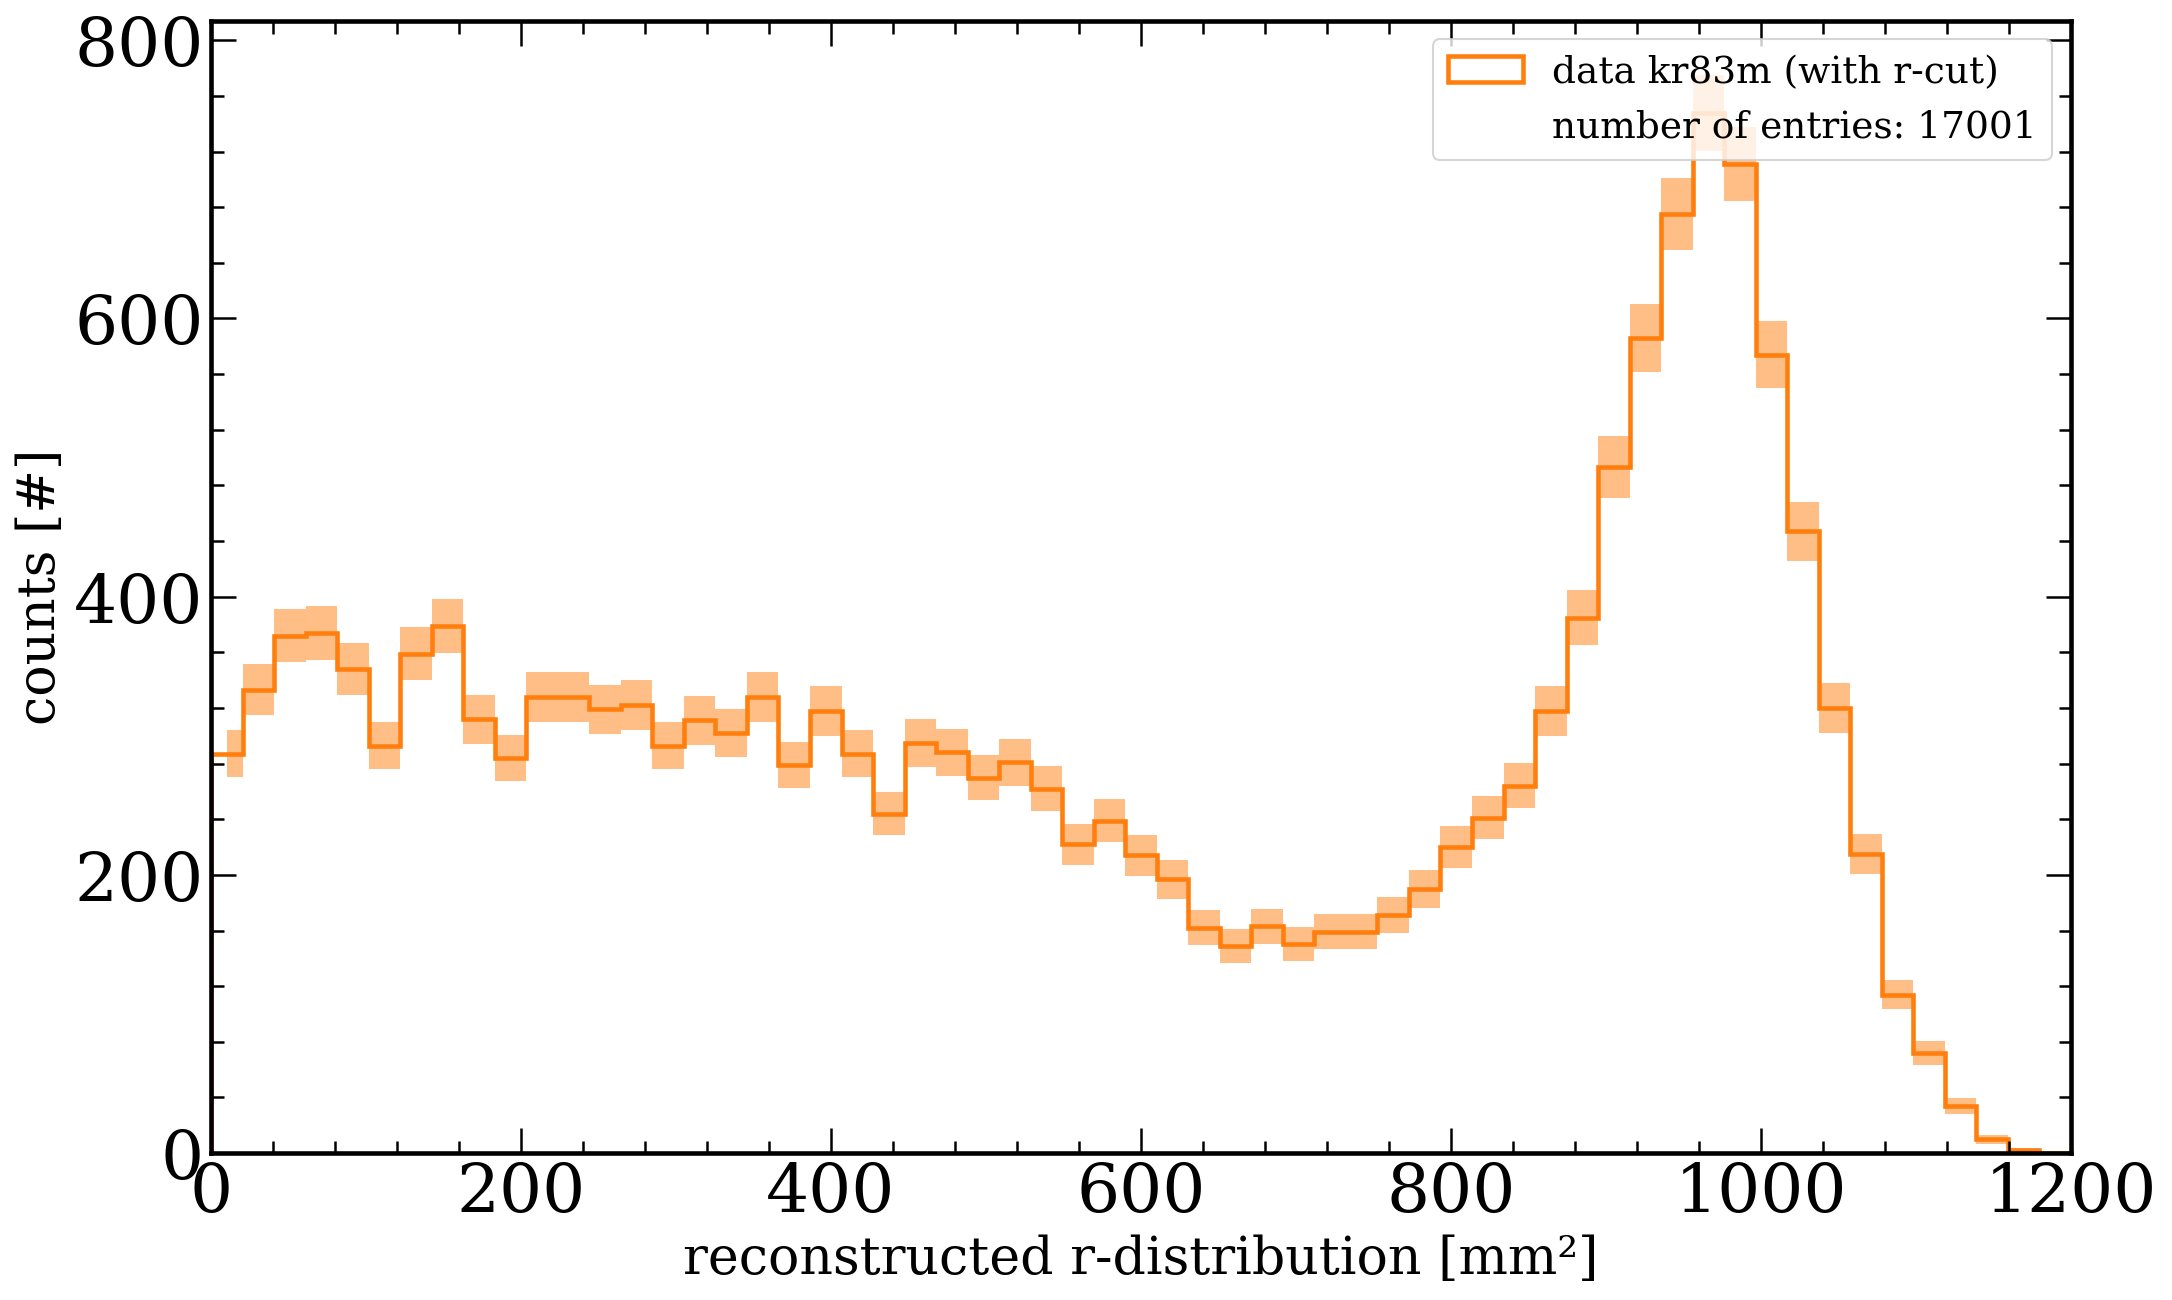

In [16]:
fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot


bins_x = np.linspace(0,1200,60)
bins_x_center = (bins_x[1:] + bins_x[:-1])/2
bin_fullwidths = (bins_x[1:] - bins_x[:-1])

positions_cs_r2 = np.array(r_positions_fiducial_all['00178'])**2
positions_kr_r2 = np.array(r_positions_all['00158'])**2




counts,_, patches = plt.hist(positions_kr_r2, bins=bins_x, density = False, 
                            histtype='step', linewidth = 2.2, color = 'C1',
                            label = 'data kr83m (with r-cut)')


plt.fill_between(bins_x_center, counts - np.sqrt(counts), counts + np.sqrt(counts), 
                 facecolor='C1', alpha=0.5, step = 'mid')

axes.plot([], [], ' ', label="number of entries: "+str(len(positions_kr_r2)))
axes.set_xlabel('reconstructed r-distribution [mm²]')
axes.set_ylabel('counts [#]')

handles,labels = axes.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]


axes.legend(handles,labels, loc = 1,prop={'size': 18})

plt.ylim(bottom = 0)
plt.xlim(0,1200)
plt.show()


In [10]:
from mpl_toolkits.mplot3d import Axes3D
import random


In [11]:
for i in z:
    if i <= -80:
        print(i)

In [12]:
#print(len(x_positions_all['00178']))
print(len(x_positions_all['00158']))

6916


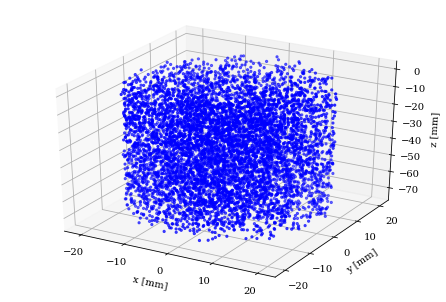

In [13]:
# true_z= []
# print(type(y))
# for i in z:
#     if i >= -72.5:
#         true_z.append(i)

fig = plt.figure()
ax = Axes3D(fig)




ax.scatter(x_positions_all['00158'], y_positions_all['00158'], z_positions_all['00158'], c='b', marker='o',s=5)
ax.set_xlabel('x [mm]',fontsize=10)
ax.set_ylabel('y [mm]',fontsize=10)
ax.set_zlabel('z [mm]',fontsize=10)
plt.show()